In [1]:
import pandas as pd


In [2]:
# Dataset de receitas 

receitas_1 = pd.read_excel("C:\\Users\\kika_\\OneDrive\\Área de Trabalho\\dados\\Receitas.TudoGostoso.xlsx",engine='openpyxl')


In [3]:
receitas_1.columns

Index(['id', 'Nome da Receita', 'Ingredientes'], dtype='object')

In [4]:
# Dataset de Compras
compras_1 = pd.read_csv("C:\\Users\\kika_\\OneDrive\\Documentos\\Meus Documentos\\Mackeinzie\\compras_supermercado_correto2.csv")


In [5]:
compras_1.columns

Index(['id_da_compra', 'item_1', 'item_2', 'item_3', 'item_4', 'item_5',
       'item_6', 'item_7', 'item_8', 'item_9', 'item_10', 'item_11', 'item_12',
       'item_13', 'item_14', 'item_15', 'valor_total_da_compra'],
      dtype='object')

In [6]:
# Consolidando itens comprados em uma lista e padronizando

compras_1['Itens Comprados'] = compras_1.apply(
    lambda row: [row[col].lower().strip() for col in compras_1.columns if 'item' in col and row[col].strip() != ''], axis=1)

# Remover as colunas individuais de itens

colunas_para_remover = [col for col in compras_1.columns if 'item' in col]
compras_1.drop(columns=colunas_para_remover, inplace=True)

In [7]:
compras_1.columns

Index(['id_da_compra', 'valor_total_da_compra', 'Itens Comprados'], dtype='object')

In [8]:
# Certificando que todos os itens na coluna 'Ingredientes' são tratados como strings

compras_1['Itens Comprados'] = compras_1['Itens Comprados'].astype(str)

In [9]:
# Transformar os itens novamente em uma lista

compras_1['Itens Comprados'] = compras_1['Itens Comprados'].apply(lambda x: [ingrediente.lower().strip() for ingrediente in x.split(',')])

In [10]:
import numpy as np

compras_1['Itens Comprados']

0      [['leite integral', 'salsicha', 'sal de cozinh...
1      [['cebola', 'creme de leite', 'ervilha', 'chuc...
2      [['laranja', 'carne bovina', 'tangerina', 'lei...
3      [['linguiça', 'abóbora', 'molho de tomate', 'ó...
4      [['manga', 'leite integral', 'leite de coco', ...
                             ...                        
995    [['chocolate branco', 'linguiça', 'manga', 'fu...
996    [['leite condensado', 'tangerina', 'coco ralad...
997    [['óleo de soja', 'farinha de mandioca', 'ervi...
998    [['carne suína', 'limão', 'fubá de milho', 'ba...
999    [['chocolate', 'manteiga', 'açúcar', 'quiabo',...
Name: Itens Comprados, Length: 1000, dtype: object

In [11]:
 # Certificando que todos os itens na coluna 'Ingredientes' são tratados como strings

receitas_1['Ingredientes'] = receitas_1['Ingredientes'].astype(str)

In [12]:
# Transformar os itens novamente em uma lista

receitas_1['Ingredientes'] = receitas_1['Ingredientes'].apply(lambda x: [ingrediente.lower().strip() for ingrediente in x.split(',')])

In [13]:
receitas_1['Ingredientes']

0     [polvilho doce, tempero ou sal, leite, óleo, o...
1                            [polvilho doce, sal, água]
2     [ovos, açúcar, trigo, fubá, margarina, leite, ...
3     [feijão preto, carne de porco (linguiça, coste...
4     [peixe (robalo, badejo), dendê, leite de coco,...
5     [leite condensado, chocolate em pó, manteiga, ...
6     [frango cozido e desfiado, massa de batata, fa...
7     [gemas de ovo, açúcar, coco ralado, manteiga, ...
8     [camarões, mandioca, leite de coco, azeite de ...
9     [feijão fradinho, cebola, camarão seco, azeite...
10    [pão amanhecido, camarões, amendoim, castanha ...
11    [bacalhau dessalgado, batata, cebola, alho, sa...
12    [farinha de milho, água, sal, sardinha, ovos c...
13    [macarrão parafuso, carne moída, pimentão, alh...
14    [chocolate em pó, açúcar, farinha de trigo, ma...
15    [massa de pastel, presunto, queijo, molho de t...
16    [salsichas, ovos, leite, óleo, farinha de trig...
17    [frango desfiado, creme de leite, milho ve

In [22]:
# Normalizar os dados

import re

def normalizar_ingredientes(texto):
    # Remove tudo entre parênteses, incluindo os próprios parênteses
    texto = re.sub(r'\(.*?\)', '', texto)
    # Substitui " e " por ", "
    texto = texto.replace(" e ", ", ")
    # Remove caracteres especiais exceto acentos e vírgulas
    texto = re.sub(r'[^a-zA-Z0-9áéíóúÁÉÍÓÚàèìòùÀÈÌÒÙâêîôûÂÊÎÔÛãõÃÕñÑçÇ,\s]', '', texto)
    # Remove espaços extras
    texto = re.sub(r'\s+', ' ', texto).strip()
    # Remove pontos
    texto = texto.replace('.', '')
    return texto

def normalizar_lista_ingredientes(lista_ingredientes):
    ingredientes_normalizados = [normalizar_ingredientes(ingrediente) for ingrediente in lista_ingredientes]
    return ingredientes_normalizados


In [23]:
# Aplicando a base de compras

compras_1['Itens Comprados N'] = compras_1['Itens Comprados'].apply(normalizar_lista_ingredientes)



In [24]:
# Exibindo os resultados normalizados

print(compras_1[['Itens Comprados', 'Itens Comprados N']])

                                       Itens Comprados  \
0    [['leite integral', 'salsicha', 'sal de cozinh...   
1    [['cebola', 'creme de leite', 'ervilha', 'chuc...   
2    [['laranja', 'carne bovina', 'tangerina', 'lei...   
3    [['linguiça', 'abóbora', 'molho de tomate', 'ó...   
4    [['manga', 'leite integral', 'leite de coco', ...   
..                                                 ...   
995  [['chocolate branco', 'linguiça', 'manga', 'fu...   
996  [['leite condensado', 'tangerina', 'coco ralad...   
997  [['óleo de soja', 'farinha de mandioca', 'ervi...   
998  [['carne suína', 'limão', 'fubá de milho', 'ba...   
999  [['chocolate', 'manteiga', 'açúcar', 'quiabo',...   

                                     Itens Comprados N  
0    [leite integral, salsicha, sal de cozinha, mel...  
1    [cebola, creme de leite, ervilha, chuchu, choc...  
2    [laranja, carne bovina, tangerina, leite ferme...  
3    [linguiça, abóbora, molho de tomate, óleo de s...  
4    [manga, leite

In [25]:
# Aplicando a base de receitas

receitas_1['Ingredientes N'] = receitas_1['Ingredientes'].apply(normalizar_lista_ingredientes)

# Exibindo os resultados normalizados

print(receitas_1[['Ingredientes', 'Ingredientes N']])

                                         Ingredientes  \
0   [polvilho doce, tempero ou sal, leite, óleo, o...   
1                          [polvilho doce, sal, água]   
2   [ovos, açúcar, trigo, fubá, margarina, leite, ...   
3   [feijão preto, carne de porco (linguiça, coste...   
4   [peixe (robalo, badejo), dendê, leite de coco,...   
5   [leite condensado, chocolate em pó, manteiga, ...   
6   [frango cozido e desfiado, massa de batata, fa...   
7   [gemas de ovo, açúcar, coco ralado, manteiga, ...   
8   [camarões, mandioca, leite de coco, azeite de ...   
9   [feijão fradinho, cebola, camarão seco, azeite...   
10  [pão amanhecido, camarões, amendoim, castanha ...   
11  [bacalhau dessalgado, batata, cebola, alho, sa...   
12  [farinha de milho, água, sal, sardinha, ovos c...   
13  [macarrão parafuso, carne moída, pimentão, alh...   
14  [chocolate em pó, açúcar, farinha de trigo, ma...   
15  [massa de pastel, presunto, queijo, molho de t...   
16  [salsichas, ovos, leite, ól

In [26]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Criando a coluna 'Ingredientes_Str' a partir dos ingredientes normalizados

receitas_1['Ingredientes_Str'] = receitas_1['Ingredientes N'].apply(lambda x: ' '.join(x))

print(receitas_1.head())


   id   Nome da Receita                                       Ingredientes  \
0   1     Pão de Queijo  [polvilho doce, tempero ou sal, leite, óleo, o...   
1   2           Tapioca                         [polvilho doce, sal, água]   
2   3      Bolo de Fubá  [ovos, açúcar, trigo, fubá, margarina, leite, ...   
3   4          Feijoada  [feijão preto, carne de porco (linguiça, coste...   
4   5  Moqueca de Peixe  [peixe (robalo, badejo), dendê, leite de coco,...   

                                      Ingredientes N  \
0  [polvilho doce, tempero ou sal, leite, óleo, o...   
1                         [polvilho doce, sal, água]   
2  [ovos, açúcar, trigo, fubá, margarina, leite, ...   
3  [feijão preto, carne de porco linguiça, costel...   
4  [peixe robalo, badejo, dendê, leite de coco, t...   

                                    Ingredientes_Str  
0  polvilho doce tempero ou sal leite óleo ovos q...  
1                             polvilho doce sal água  
2    ovos açúcar trigo fubá m

In [27]:
vectorizer = CountVectorizer(tokenizer=lambda txt: txt.split())

# Assegure-se de que a coluna 'Ingredientes_Str' está presente e corretamente preenchida

vectorizer.fit(receitas_1['Ingredientes_Str'])


C:\Users\kika_\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:516: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


CountVectorizer(tokenizer=<function <lambda> at 0x00000228A7D79700>)

In [28]:
# Definindo vetor de receitas

receitas_vec = vectorizer.transform(receitas_1['Ingredientes_Str'])


In [29]:
# Definindo vetor de compras

compra_1_str = ' '.join(compras_1['Itens Comprados N'].iloc[0]) 

compras_vec = vectorizer.transform([compra_1_str])  



In [35]:
# Função para recomendar receitas baseada em uma lista de compras

def recomendar_receitas_para_compra(lista_compras_str):
    
    compra_vec = vectorizer.transform([lista_compras_str])
    
    similaridades = cosine_similarity(compra_vec, receitas_vec)
    
    # Obtendo os índices das receitas com as maiores similaridades
    
    indices_similares = similaridades.argsort()[0][::-1][:3]
     
    # Extrai as recomendações baseadas nos índices obtidos
    
    recomendacoes = [(receitas_1.iloc[indice]['Nome da Receita'], similaridades[0][indice]) for indice in indices_similares]
    
    return recomendacoes


In [36]:
# Função para imprimir recomendações formatadas para cada lista de compras

def imprimir_recomendacoes(recomendacoes, num_lista):
    print(f"Recomendações para a lista de compras {num_lista}:")
    for nome_receita, _ in recomendacoes:
        print(f"- {nome_receita}")

# Aplicando a recomendação para cada compra e imprimindo os resultados

for indice, compra in compras_1.iterrows():
    lista_compras_str = ' '.join(compra['Itens Comprados N'])
    recomendacoes = recomendar_receitas_para_compra(lista_compras_str)
    imprimir_recomendacoes(recomendacoes, indice + 1) 
    print("\n") 

Recomendações para a lista de compras 1:
- Nhoque à bolonhesa 
- Massa de Pizza
- Strogonoff de Carne


Recomendações para a lista de compras 2:
- Danoninho Caseiro
- Bobó de Camarão
- Moqueca de Peixe


Recomendações para a lista de compras 3:
- Danoninho Caseiro
- Massa de Panqueca
- Nhoque à bolonhesa 


Recomendações para a lista de compras 4:
- Nhoque à bolonhesa 
- Cuscuz Paulista
- Massa de Panqueca


Recomendações para a lista de compras 5:
- Danoninho Caseiro
- Massa de Panqueca
- Bobó de Camarão


Recomendações para a lista de compras 6:
- Danoninho Caseiro
- Massa de Panqueca
- Vatapá


Recomendações para a lista de compras 7:
- Massa de Panqueca
- Bolinho de Chuva
- Bolo


Recomendações para a lista de compras 8:
- Danoninho Caseiro
- Bobó de Camarão
- Vatapá


Recomendações para a lista de compras 9:
- Nhoque à bolonhesa 
- Panqueca de Carne Moída
- Cuscuz Paulista


Recomendações para a lista de compras 10:
- Panqueca de Carne Moída
- Nhoque à bolonhesa 
- Panqueca de Car

In [37]:
# Análise dos resultados. Gráfico de distribuição dos valores de Similaridade
# Convertendo em uma lista plana de valores de similaridade 

similaridades_todas_compras = cosine_similarity(compras_vec, receitas_vec)
valores_similaridade = similaridades_todas_compras.flatten()

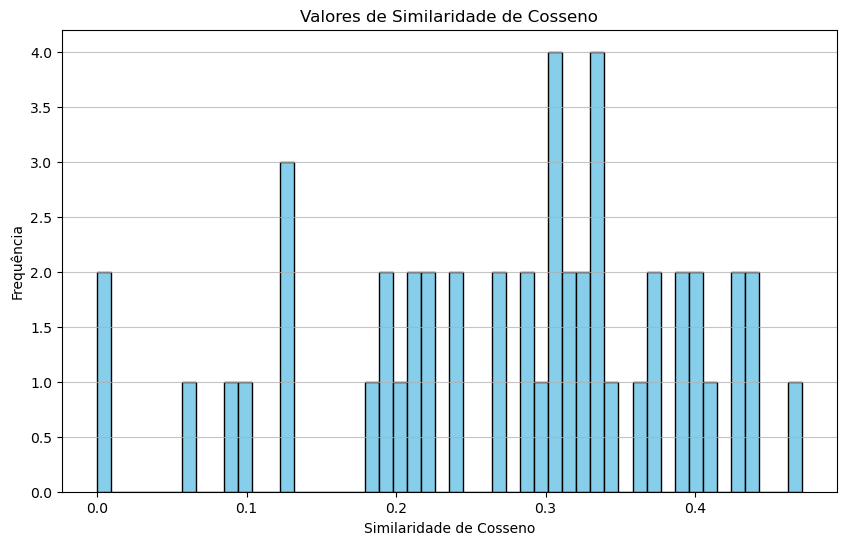

In [38]:
# Gráfico de distribuição

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(valores_similaridade, bins=50, color='skyblue', edgecolor='black')
plt.title('Valores de Similaridade de Cosseno')
plt.xlabel('Similaridade de Cosseno')
plt.ylabel('Frequência')
plt.grid(axis='y', alpha=0.75)

plt.show()


In [41]:
# Calcular o total de valores de similaridade em cada compra

quantidade_abaixo_0_5 = np.sum(valores_similaridade < 0.5)
quantidade_acima_ou_igual_0_5 = np.sum(valores_similaridade >= 0.5)

# Calcular o total de valores de similaridade 

total_valores = len(valores_similaridade)

# Calcular os %

percentual_abaixo_0_5 = (quantidade_abaixo_0_5 / total_valores) * 100
percentual_acima_ou_igual_0_5 = (quantidade_acima_ou_igual_0_5 / total_valores) * 100

# Resultados

print(f"Percentual de recomendações com similaridade abaixo de 0.5: {percentual_abaixo_0_5:.2f}%")
print(f"Percentual de recomendações com similaridade igual ou acima de 0.5: {percentual_acima_ou_igual_0_5:.2f}%")



Percentual de recomendações com similaridade abaixo de 0.5: 100.00%
Percentual de recomendações com similaridade igual ou acima de 0.5: 0.00%


In [42]:
# Definindo um limiar de aceitação para melhoria da relevância das receitas recomendadas

threshold_de_aceitacao = 0.4 


In [43]:
def recomendar_receitas_para_compra(lista_compras_str, threshold):
    compra_vec = vectorizer.transform([lista_compras_str])
    similaridades = cosine_similarity(compra_vec, receitas_vec)
    
    # Filtro baseado no threshold
    
    indices_similares = [indice for indice in similaridades.argsort()[0][::-1] if similaridades[0][indice] >= threshold]
    
    # As 3 top recomendações que atendem ao threshold
    
    recomendacoes = [(receitas_1.iloc[indice]['Nome da Receita'], similaridades[0][indice]) for indice in indices_similares][:3]
    return recomendacoes



In [44]:
# Aplicando a função com o threshold para cada compra

compras_1['Recomendações'] = compras_1['Itens Comprados N'].apply(lambda x: ' '.join(x)).apply(lambda x: recomendar_receitas_para_compra(x, threshold_de_aceitacao))

# Exibindo as recomendações filtradas

for indice, recomendacoes in enumerate(compras_1['Recomendações']):
    print(f"Recomendações para a lista de compras {indice+1}:")
    for nome_receita, similaridade in recomendacoes:
        print(f"- {nome_receita} (Similaridade: {similaridade})")
    print("\n")


Recomendações para a lista de compras 1:
- Nhoque à bolonhesa  (Similaridade: 0.47140452079103173)
- Massa de Pizza (Similaridade: 0.44194173824159216)
- Strogonoff de Carne (Similaridade: 0.44194173824159216)


Recomendações para a lista de compras 2:
- Danoninho Caseiro (Similaridade: 0.6481812160876688)
- Bobó de Camarão (Similaridade: 0.6000991981489792)
- Moqueca de Peixe (Similaridade: 0.5940885257860046)


Recomendações para a lista de compras 3:
- Danoninho Caseiro (Similaridade: 0.6316139407998893)
- Massa de Panqueca (Similaridade: 0.5954913341754138)
- Nhoque à bolonhesa  (Similaridade: 0.5844720395466498)


Recomendações para a lista de compras 4:
- Nhoque à bolonhesa  (Similaridade: 0.6299407883487123)
- Cuscuz Paulista (Similaridade: 0.6157935373745563)
- Massa de Panqueca (Similaridade: 0.6000991981489793)


Recomendações para a lista de compras 5:
- Danoninho Caseiro (Similaridade: 0.6546536707079772)
- Massa de Panqueca (Similaridade: 0.6172133998483678)
- Bobó de Cama

In [45]:
# Nova avaliação dos resultados após a aplicação do threshold

def recomendar_receitas_e_coletar_similaridades(lista_compras_str, threshold):
    compra_vec = vectorizer.transform([lista_compras_str])
    similaridades = cosine_similarity(compra_vec, receitas_vec)[0]
    
    # Filtrando os valores de similaridade que atendem ao threshold
    similaridades_filtradas = similaridades[similaridades >= threshold]
    
    # Ordenando as similaridades filtradas e pegando os top N valores
    
    top_similaridades = np.sort(similaridades_filtradas)[::-1][:3]
    
    return top_similaridades

# Coletando os valores de similaridade para todas as listas de compras

valores_similaridade_filtrados = np.concatenate(
    compras_1['Itens Comprados N'].apply(lambda x: ' '.join(x)).apply(lambda x: recomendar_receitas_e_coletar_similaridades(x, threshold_de_aceitacao))
).ravel()


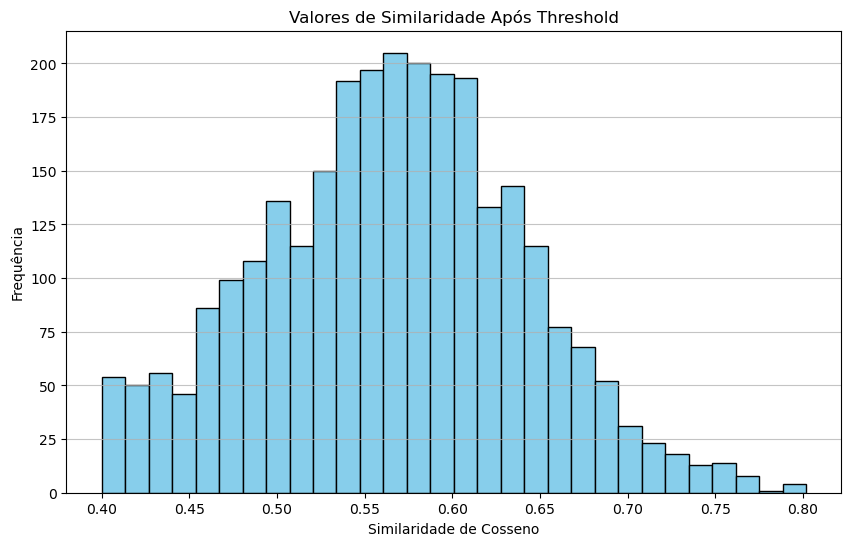

In [46]:
# Gráfico

plt.figure(figsize=(10, 6))
plt.hist(valores_similaridade_filtrados, bins=30, color='skyblue', edgecolor='black')
plt.title('Valores de Similaridade Após Threshold')
plt.xlabel('Similaridade de Cosseno')
plt.ylabel('Frequência')
plt.grid(axis='y', alpha=0.75)

plt.show()


In [47]:
# Verificação dos resultados em %

dentro_threshold = np.sum(valores_similaridade_filtrados >= threshold_de_aceitacao) / len(valores_similaridade_filtrados)
abaixo_threshold_acima_0 = np.sum((valores_similaridade_filtrados > 0) & (valores_similaridade_filtrados < threshold_de_aceitacao)) / len(valores_similaridade_filtrados)
abaixo_0 = np.sum(valores_similaridade_filtrados < 0) / len(valores_similaridade_filtrados)

# Convertendo para %

percentual_dentro_threshold = dentro_threshold * 100
percentual_abaixo_threshold_acima_0 = abaixo_threshold_acima_0 * 100
percentual_abaixo_0 = abaixo_0 * 100

# Resultados

print(f"Percentual de receitas dentro do threshold ({threshold_de_aceitacao}): {percentual_dentro_threshold:.2f}%")
print(f"Percentual de receitas com similaridade entre 0 e {threshold_de_aceitacao - 0.01}: {percentual_abaixo_threshold_acima_0:.2f}%")
print(f"Percentual de receitas com similaridade abaixo de 0: {percentual_abaixo_0:.2f}%")


Percentual de receitas dentro do threshold (0.4): 100.00%
Percentual de receitas com similaridade entre 0 e 0.39: 0.00%
Percentual de receitas com similaridade abaixo de 0: 0.00%
